In [1]:
import pandas as pd

In [2]:
raw_path = "/home/hayashi/unreal_p2/Research/Config/CSV/RawFish.txt"

In [3]:
with open(raw_path, "rb") as f:
    raw = f.read()

print(raw[:200])
print(type(raw))


b'2026-01-07_14-18-58.f::-0.541675;-0.324826;0.775291\\n2026-01-07_14-18-58.f::-0.541675;-0.324826;0.775291\\n2026-01-07_14-18-58.f::-0.541675;-0.324826;0.775291\\n2026-01-07_14-18-58.f::-0.541675;-0.32482'
<class 'bytes'>


In [4]:
raw_str = raw.decode("utf-8")

rows = raw_str.split("\\n")

print("Rows:", len(rows))
for r in rows[:3]:
    print(repr(r))


Rows: 4564
'2026-01-07_14-18-58.f::-0.541675;-0.324826;0.775291'
'2026-01-07_14-18-58.f::-0.541675;-0.324826;0.775291'
'2026-01-07_14-18-58.f::-0.541675;-0.324826;0.775291'


In [5]:
timestamps = []
xs = []
ys = []
zs = []

for row in rows:
    row = row.strip()
    if not row:
        continue

    # split timestamp vs coordinates
    ts, coords = row.split("::", 1)

    # split coordinates
    x_str, y_str, z_str = coords.split(";")

    timestamps.append(ts)
    xs.append(float(x_str))
    ys.append(float(y_str))
    zs.append(float(z_str))

print(len(timestamps), len(xs), len(ys), len(zs))
print(timestamps[:3])
print(xs[:3], ys[:3], zs[:3])


4563 4563 4563 4563
['2026-01-07_14-18-58.f', '2026-01-07_14-18-58.f', '2026-01-07_14-18-58.f']
[-0.541675, -0.541675, -0.541675] [-0.324826, -0.324826, -0.324826] [0.775291, 0.775291, 0.775291]


In [8]:
import pandas as pd

df = pd.DataFrame({
    "timestamp": timestamps,
    "x": xs,
    "y": ys,
    "z": zs,
})

df

,timestamp,x,y,z
0,2026-01-07_14-18-58.f,-0.541675,-0.324826,0.775291
1,2026-01-07_14-18-58.f,-0.541675,-0.324826,0.775291
2,2026-01-07_14-18-58.f,-0.541675,-0.324826,0.775291
3,2026-01-07_14-18-58.f,-0.541675,-0.324826,0.775291
4,2026-01-07_14-18-58.f,-0.541675,-0.324826,0.775291
...,...,...,...,...
4558,2026-01-07_14-19-22.f,0.766044,-0.492404,0.413176
4559,2026-01-07_14-19-22.f,0.766044,-0.492404,0.413176
4560,2026-01-07_14-19-22.f,0.766044,-0.492404,0.413176
4561,2026-01-07_14-19-22.f,0.766044,-0.492404,0.413176


In [9]:
df.groupby("timestamp")[["x", "y", "z"]].nunique()


,x,y,z
timestamp,,,
2026-01-07_14-18-58.f,66,66,66
2026-01-07_14-18-59.f,69,69,69
2026-01-07_14-19-00.f,67,67,67
2026-01-07_14-19-01.f,74,74,74
2026-01-07_14-19-02.f,75,75,75
2026-01-07_14-19-03.f,77,77,77
2026-01-07_14-19-04.f,79,79,79
2026-01-07_14-19-05.f,80,80,80
2026-01-07_14-19-06.f,78,78,78


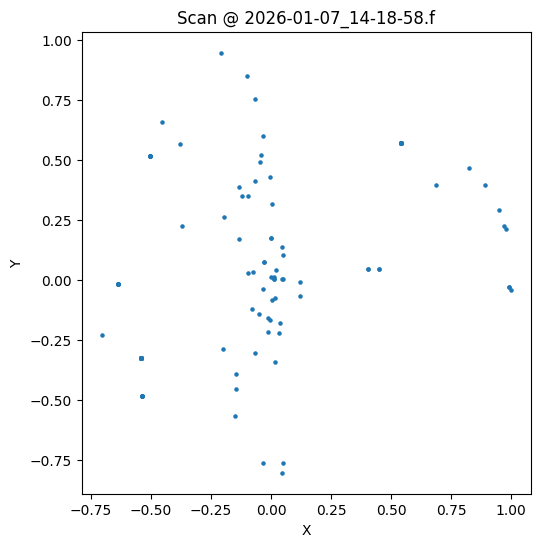

In [10]:
import matplotlib.pyplot as plt

ts = df["timestamp"].iloc[0]
scan = df[df["timestamp"] == ts]

plt.figure(figsize=(6, 6))
plt.scatter(scan["x"], scan["y"], s=5)
plt.gca().set_aspect("equal")
plt.title(f"Scan @ {ts}")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


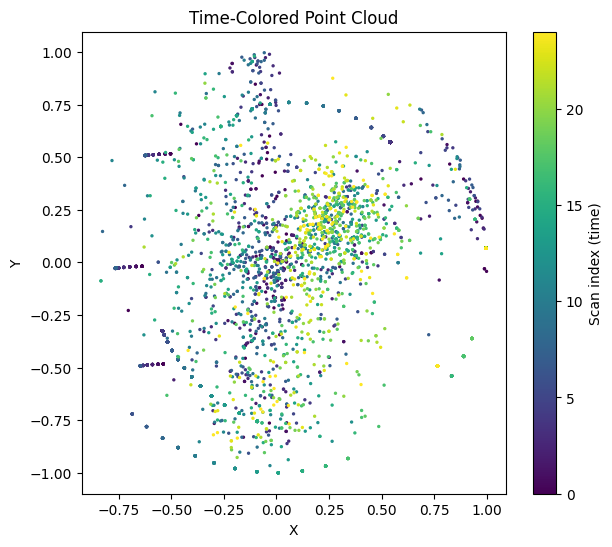

In [11]:
df["scan_id"] = df.groupby("timestamp").ngroup()
plt.figure(figsize=(7, 6))
plt.scatter(
    df["x"],
    df["y"],
    c=df["scan_id"],
    s=2,
    cmap="viridis"
)
plt.colorbar(label="Scan index (time)")
plt.gca().set_aspect("equal")
plt.title("Time-Colored Point Cloud")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


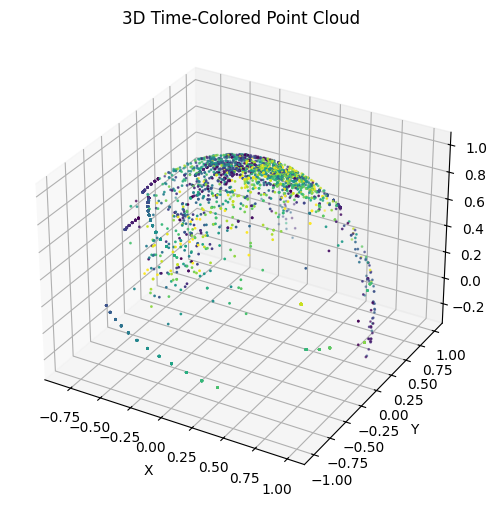

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["x"], df["y"], df["z"], s=1, c=df["scan_id"], cmap="viridis")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.title("3D Time-Colored Point Cloud")
plt.show()


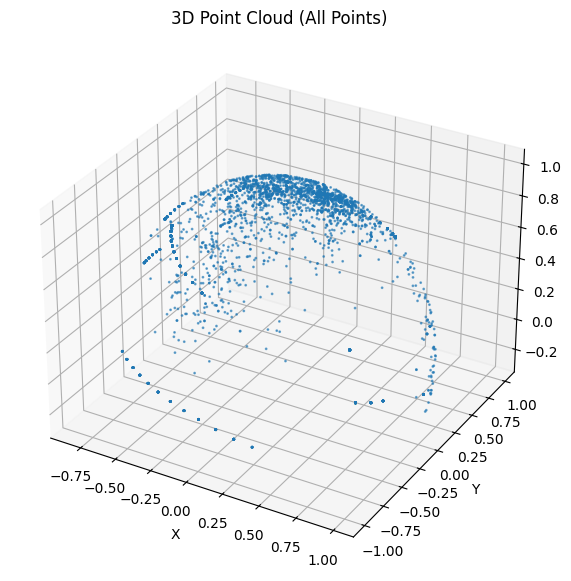

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    df["x"],
    df["y"],
    df["z"],
    s=1,
    alpha=0.6
)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Point Cloud (All Points)")

plt.show()
